In [22]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *

%matplotlib inline

fig_name = "consensus_nonconsensus_compare"
mg_color = '#00af2b'
h2o_color = '#df0303'
mg_light_color = '#b2e7bf'
h2o_light_color = '#f29a9a'

ticksize = 12
labelsize = 14
dpi = 400
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['mathtext.fontset'] = 'cm' 


In [23]:
df = pd.read_csv('all_solvent_consensus_status_withconsensus.csv')
df22wat = df[(df.model=='2.2Å') & (df.solvent=="HOH")].copy()
df22mg = df[(df.model=='2.2Å') & (df.solvent=="MG")].copy()
df23wat = df[(df.model=='2.3Å') & (df.solvent=="HOH")].copy()
df23mg = df[(df.model=='2.3Å') & (df.solvent=="MG")].copy()

# either
df22wat['Consensus'] = df22wat['consensus of wat in 2.3Å'] #((df22wat['within 1A of wat in 2.3Å']>0) & (df22wat['exact binding spot of wat in 2.3Å']>0))
df23wat['Consensus'] = df23wat['consensus of wat in 2.2Å'] #((df23wat['within 1A of wat in 2.2Å']>0) & (df23wat['exact binding spot of wat in 2.2Å']>0))
df22mg['Consensus'] = df22mg['consensus of mg in 2.3Å'] #((df22mg['within 1A of mg in 2.3Å']>0) & (df22mg['exact binding spot of mg in 2.3Å']>0))
df23mg['Consensus'] = df23wat['consensus of mg in 2.2Å'] #((df23mg['within 1A of mg in 2.2Å']>0) & (df23mg['exact binding spot of mg in 2.2Å']>0))

In [24]:
qscore_22_file = QSCORE_22
qscore_23_file = QSCORE_23

# read and format Qscores
col_names = ['atom_name','residue_number','residue_name','x_coord','y_coord','z_coord','Qscore']

qscore_22 = pd.read_csv(qscore_22_file,names=col_names)
qscore_22["residue_number"] = qscore_22.residue_number.apply(lambda x: int(x.split(".")[0]))
qscore_23 = pd.read_csv(qscore_23_file,names=col_names)
qscore_23["residue_number"] = qscore_23.residue_number.apply(lambda x: int(x.split(".")[0]))

In [25]:
q22wat = qscore_22[qscore_22.residue_name=="HOH"]
q22wat = dict(zip(q22wat.residue_number, q22wat.Qscore))
df22wat['Qscore'] = df22wat.residue_number.replace(q22wat)
q22mg = qscore_22[qscore_22.residue_name=="MG"]
q22mg = dict(zip(q22mg.residue_number, q22mg.Qscore))
df22mg['Qscore'] = df22mg.residue_number.replace(q22mg)

q23wat = qscore_23[qscore_23.residue_name=="HOH"]
q23wat = dict(zip(q23wat.residue_number, q23wat.Qscore))
df23wat['Qscore'] = df23wat.residue_number.replace(q23wat)
q23mg = qscore_23[qscore_23.residue_name=="MG"]
q23mg = dict(zip(q23mg.residue_number, q23mg.Qscore))
df23mg['Qscore'] = df23mg.residue_number.replace(q23mg)

In [26]:
df = pd.concat([df22wat,df23wat,df22mg,df23mg])
df["category"] = df.solvent + df.Consensus.astype(str)

# leaving out water >0.5 for now
df = df[df.binding_site==df.binding_site]
per_res_info = pd.read_csv('../per_residue_comparison/per_residue_summary.csv')
per_res_rmsd_dict = dict(zip(per_res_info.residue_number, per_res_info.RMSD))
per_res_Q22_dict = dict(zip(per_res_info.residue_number, per_res_info["Qscore 2.2A"]))
per_res_Q23_dict = dict(zip(per_res_info.residue_number, per_res_info["Qscore 2.3A"]))
df["avg_rmsd_nearby"] = df.binding_site.apply(lambda atoms: np.mean([per_res_rmsd_dict[int(res)] for res in [atom.split("-")[1].split(":")[0] for atom in atoms.split()] if res!='414']))
df["avg_Q_nearby"] = df.apply(lambda row: np.mean([per_res_Q22_dict[int(res)] for res in[atom.split("-")[1].split(":")[0] for atom in row.binding_site.split()]  if res!='414']) if row.model=="2.2" else np.mean([per_res_Q23_dict[int(res)] for res in[atom.split("-")[1].split(":")[0] for atom in row.binding_site.split()]  if res!='414']), axis=1)
df22wat = df[(df.model=='2.2Å') & (df.solvent=="HOH")].copy()
df23wat = df[(df.model=='2.3Å') & (df.solvent=="HOH")].copy()

/tmp/ipykernel_112124/2383678318.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["category"] = df.solvent + df.Consensus.astype(str)


25 33
0.15003328412411276 346.0 25 33
276 285
0.00047001156795298585 32980.5 276 285
25 33
0.039315166863929496 300.0 25 33
276 285
4.9527819037816195e-06 30847.5 276 285
25 33
0.023063583104159208 285.0 25 33
276 285
2.873128141909181e-05 31608.0 276 285


/tmp/ipykernel_112124/2435427798.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_112124/2435427798.py:26: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_112124/2435427798.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  x=g.set_xticklabels(xticks,size=ticksize*0.8,rotation=90,ha="center")
/tmp/ipykernel_112124/2435427798.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_112124/2435427798.py:26: FutureWar

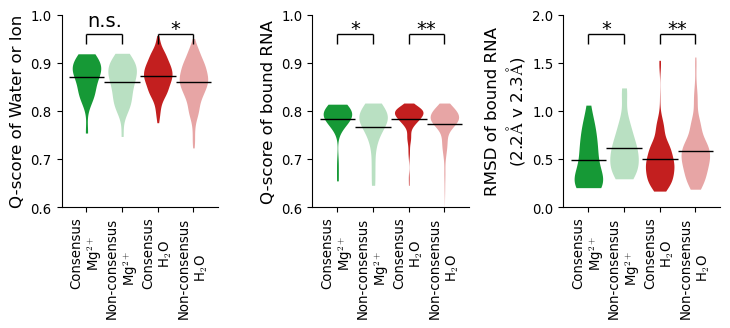

In [27]:
def get_sig(p):
    if p>0.05: sig="n.s."
    elif p>0.0001:  sig="*"
    elif p>0.000001: sig="**"
    elif p>0.00000001: sig="***"
    else: sig="****"
    return sig

def plot_a_score_by_consensus(df,y,ax,ymin,ymax,xticks=None,ylabel=None):
    g1 = df[df.category=="MGTrue"][y].values
    g2 = df[df.category=="MGFalse"][y].values
    print(len(g1),len(g2))
    g1 = g1[~np.isnan(g1)]
    g2 = g2[~np.isnan(g2)]
    t_1, p_1 = stats.mannwhitneyu(g1, g2)
    m1a, m1b = g1.mean(), g2.mean()
    print(p_1,t_1,len(g1),len(g2))
    g1 = df[df.category=="HOHTrue"][y].values
    g2 = df[df.category=="HOHFalse"][y].values
    print(len(g1),len(g2))
    g1 = g1[~np.isnan(g1)]
    g2 = g2[~np.isnan(g2)]
    t_2, p_2 = stats.mannwhitneyu(g1, g2)
    m2a, m2b = g1.mean(), g2.mean()
    print(p_2,t_2,len(g1),len(g2))
    g=sns.violinplot(data=df, y=y, x="category",
             palette={"MGTrue":mg_color,
                      "MGFalse":mg_light_color,
                     "HOHTrue":h2o_color,
                      "HOHFalse":h2o_light_color},cut=0,scale="width",inner=None,linewidth=0,
            order = ["MGTrue","MGFalse","HOHTrue","HOHFalse"],ax=ax)
    g.set_xlabel("")
    if ylabel is None:
        g.set_ylabel("")
        g.set_yticks([])
    else:
        g.set_ylabel(ylabel,fontsize=ticksize)
        ax.tick_params(axis='y', labelsize=ticksize*0.8)
    g.set_ylim(ymin,ymax)
    if xticks is None:
        x=g.set_xticks([])
    else:
        x=g.set_xticklabels(xticks,size=ticksize*0.8,rotation=90,ha="center")
    sns.despine()
    
    sig_1 = get_sig(p_1)
    sig_2 = get_sig(p_2)
    # * < 0.05 ** < 104 *** < 106 **** < 108
    good_y =ymax-((ymax-ymin)*0.1)
    good_y2 =ymax-((ymax-ymin)*0.15)
    if sig_1 == "n.s.": y_now = ymax-((ymax-ymin)*0.06)
    else: y_now = good_y
    ax.text(0.5,y_now,sig_1,rotation=0,size=labelsize,ha="center")
    if sig_2 == "n.s.": y_now = ymax-((ymax-ymin)*0.06)
    else: y_now = good_y
    ax.text(2.5,y_now,sig_2,rotation=0,size=labelsize,ha="center")
    ax.hlines(good_y,0,1,"black",linewidth=1)
    ax.vlines(0,good_y,good_y2,"black",linewidth=1)
    ax.vlines(1,good_y,good_y2,"black",linewidth=1)
    ax.hlines(good_y,2,3,"black",linewidth=1)
    ax.vlines(2,good_y,good_y2,"black",linewidth=1)
    ax.vlines(3,good_y,good_y2,"black",linewidth=1)
    ax.hlines(m1a,-0.5,0.5,"black",linewidth=1)
    ax.hlines(m1b,0.5,1.5,"black",linewidth=1)
    ax.hlines(m2a,1.5,2.5,"black",linewidth=1)
    ax.hlines(m2b,2.5,3.5,"black",linewidth=1)
    
fig,axes = plt.subplots(1,3,figsize=(8.5,2.5))
plot_a_score_by_consensus(df,"Qscore",axes[0],0.6,1.0,ylabel="Q-score of Water or Ion",xticks=('Consensus\nMg$^{2+}$', 'Non-consensus\nMg$^{2+}$','Consensus\nH$_2$O','Non-consensus\nH$_2$O'))
plot_a_score_by_consensus(df,"avg_Q_nearby",axes[1],0.6,1,ylabel="Q-score of bound RNA",xticks=('Consensus\nMg$^{2+}$', 'Non-consensus\nMg$^{2+}$','Consensus\nH$_2$O','Non-consensus\nH$_2$O'))
plot_a_score_by_consensus(df,"avg_rmsd_nearby",axes[2],0,2, ylabel="RMSD of bound RNA\n(2.2$\mathrm{\AA}$ v 2.3$\mathrm{\AA}$)",xticks=('Consensus\nMg$^{2+}$', 'Non-consensus\nMg$^{2+}$','Consensus\nH$_2$O','Non-consensus\nH$_2$O'))
                          #('Non-consensus\nMg²⁺', 'Consensus\nMg²⁺','Non-consensus\nH₂O', 'Consensus\nH₂O'),
                         
fig.subplots_adjust(wspace=0.6)

plt.savefig(f"{fig_name}.png",dpi=dpi, bbox_inches="tight",transparent=True)
plt.savefig(f"{fig_name}.svg", bbox_inches="tight",transparent=True)